# AVACADO PROJECT

# Problem Statement:
    
    
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

# Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

# Identifying Type:
    
our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Importing DATA

In [3]:
#Loading data and converting to the dataframe and displaying first five rows.
df= pd.read_csv('Avocado.csv')
df= pd.DataFrame(data=df)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#lets get some basic insights about data.
df.shape

(18249, 14)

In [5]:
#Data contains both numeric and categorical variable.
# We have 3 categorical variables date,type and region either should be removed or convert to numeric value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
# Statistica info about the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


# OBSERVATIONS:

No missing values observed from statistics.

Average price minimum is 0.49 and max upto 1.68.

Data speaks about the year 2015-2016.

Also no outliers detected checking the min and max values.

# EDA (Exploratory data analysis)

In [7]:
# Lets check for null values.
# There isn't any null values luckily.
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
# Column type has only 1 value which is conventional which is not goig to affect the average price. 
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [10]:
# count of the values based on year
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

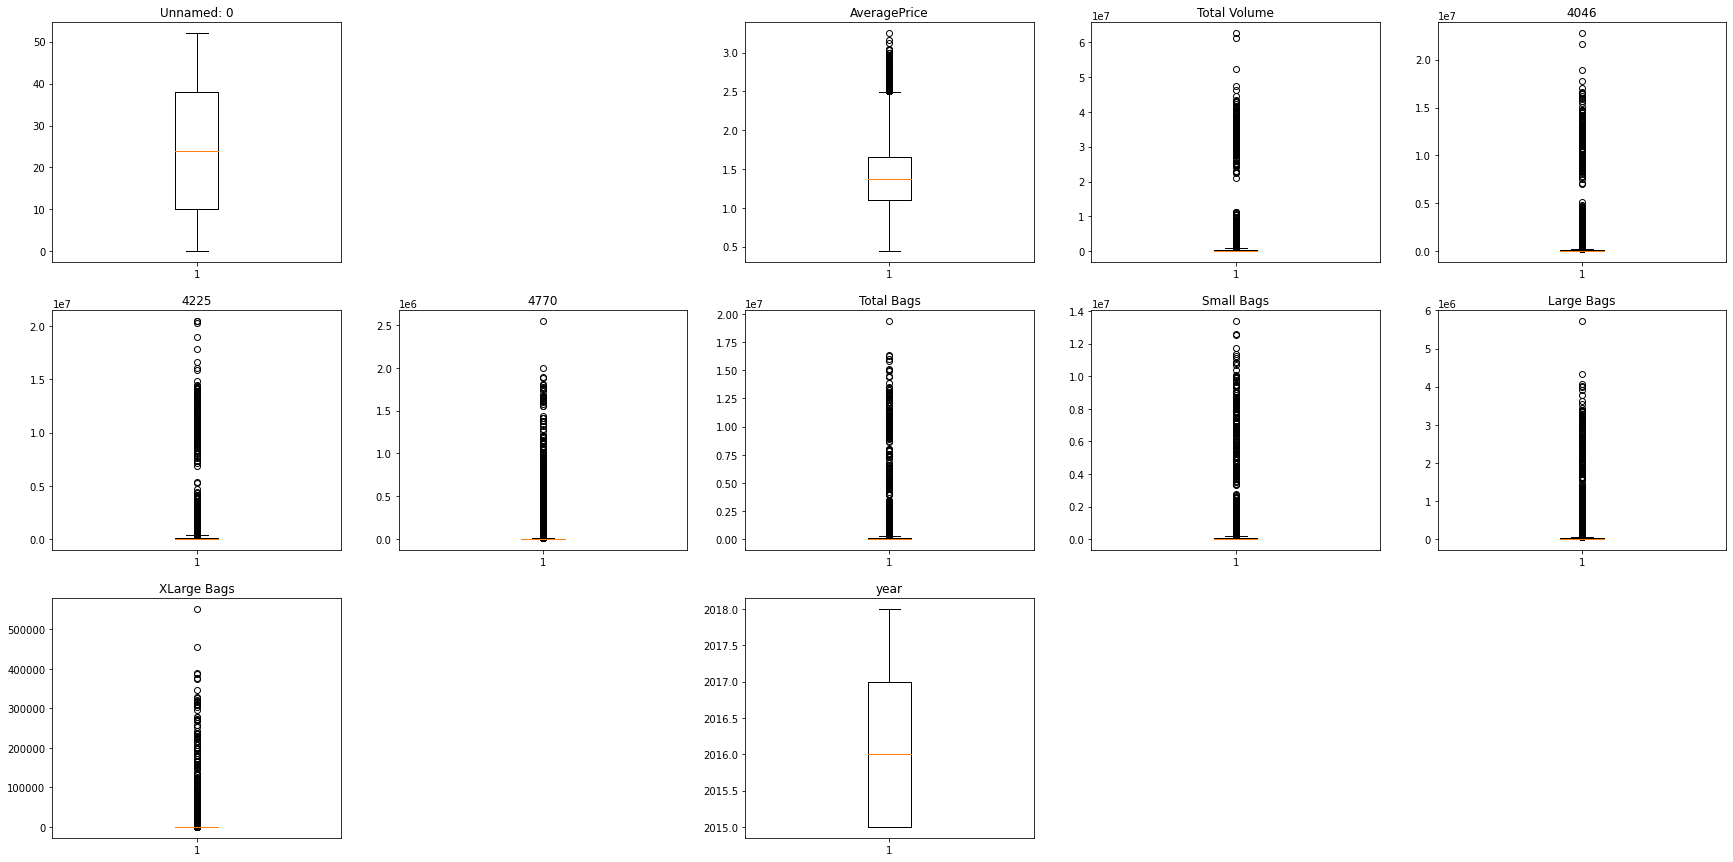

In [11]:
# A crosschecking for outliers usin boxplot
plt.figure(figsize=(30,15))

for i in range(len(df.columns)):
    if df.dtypes[i] != 'object':
        plt.subplot(3,5,i+1)
        plt.boxplot(df[df.columns[i]])
        plt.title(df.columns[i])
plt.show()

Most of the values are concentrated on the 0(y axis), we can see few outliers which are not significant.

In [12]:
# we can see that data is shown as object type so lets convert it to date type
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20


# VISUALISATIONS

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

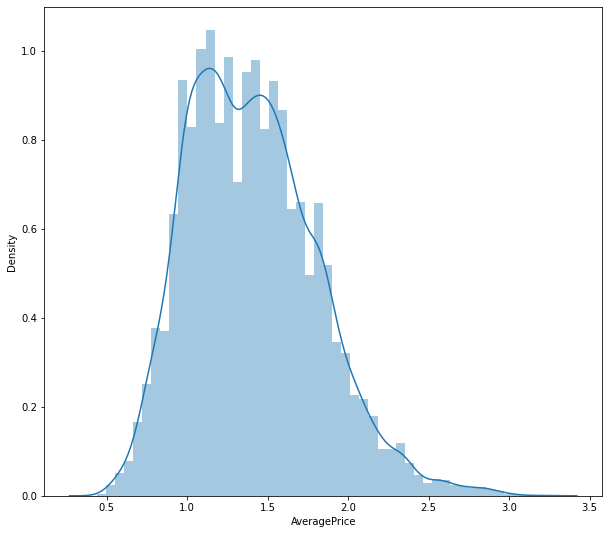

In [14]:
# Distribution of our target variable average price
fig, ax = plt.subplots(figsize=(10, 9))
sns.distplot(df.AveragePrice)

Majorly price of avocado is between 1.0, 1.4.

Text(0.5, 1.0, 'Average Price')

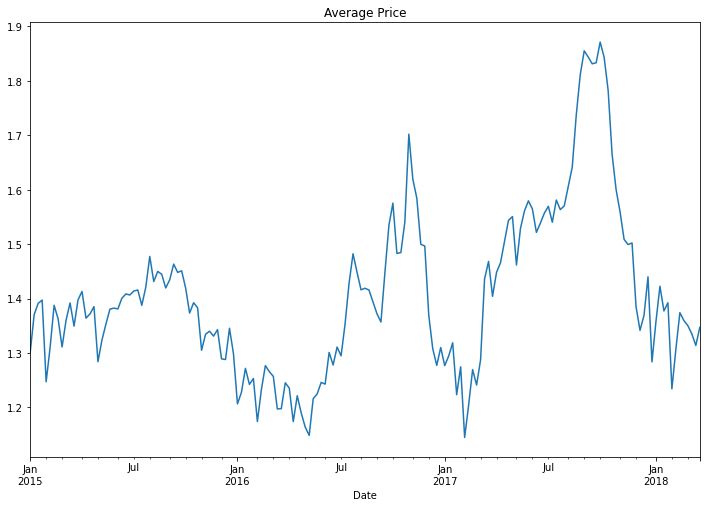

In [15]:
# Avocado's Average Price with respect to the Date
avg_price_date=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
avg_price_date['AveragePrice'].plot()
plt.title('Average Price')

price is higher from year 2016 beginning and through mid of 2016. Its highest upto 2017 beginning.

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

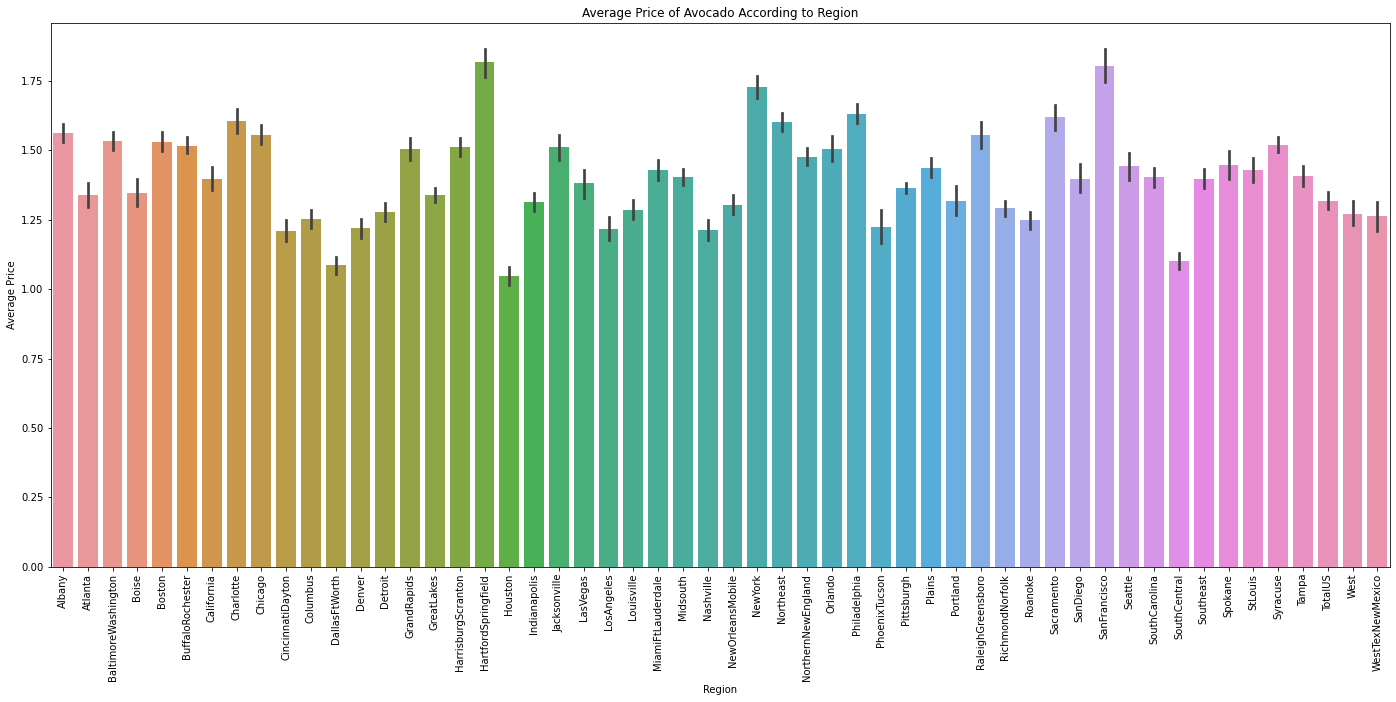

In [16]:
plt.figure(figsize=(24,10))
sns.barplot(y="AveragePrice", x="region", data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

<AxesSubplot:>

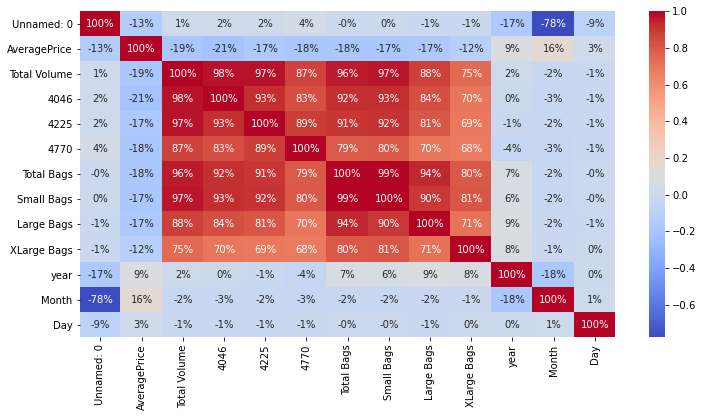

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, fmt='.0%')

Features are mostly not correleted with the Average Price column, instead most of them are correlated with each other.

In [18]:
# Dropping type column as there is only one type, date column as i have added month,day,year.
# Dropping region column as it can be a bit complex and can affect model.
df_new=pd.get_dummies(df.drop(['region','type','Date'],axis=1),drop_first=True)
df_new.head(2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20


# MODELLING

In [19]:
# Assigning input and target variables.
y=df_new['AveragePrice']
x=df_new.drop('AveragePrice', axis=1)

In [20]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 1. LINEAR REGRESSION

In [21]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.3039873799398743
MSE: 0.14482944425077326
RMSE: 0.38056463872878843


# OBSERVATIONS

1.Mean Square error is very low.

2.RMSE is low as well so our model is trained well.

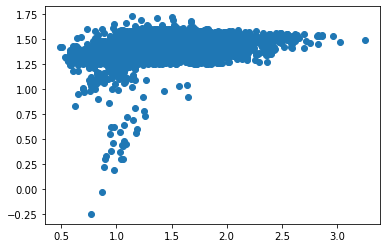

In [23]:
# ytest vs predictions
plt.scatter(x=y_test,y=pred)

# 2. DECISION TREE REGRESSION

In [24]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10214043835616439
MSE: 0.021730479819178077
RMSE: 0.14741261757114985


RMSE value is even lower than Linear Regression

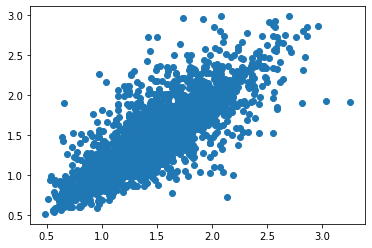

In [25]:
# ytest vs predictions
plt.scatter(x=y_test,y=pred)

# 3. RANDOM FOREST REGRESSOR

In [26]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10214043835616439
MSE: 0.021730479819178077
RMSE: 0.14741261757114985


RMSE is lowest in RadomForestRegressor.

So we can save this as the best model.

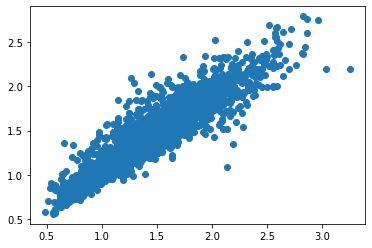

In [28]:
# ytest vs predictions
plt.scatter(x=y_test,y=pred)

# SAVING THE BEST MODEL

In [29]:
import pickle
# save the model to disk
filename = 'best_model_RFR.pkl'
pickle.dump(rfr,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0.9658, 1.0072, 1.4342, ..., 0.6172, 1.7244, 1.8509])